Naive method: 196ms
K-D tree: 0ms


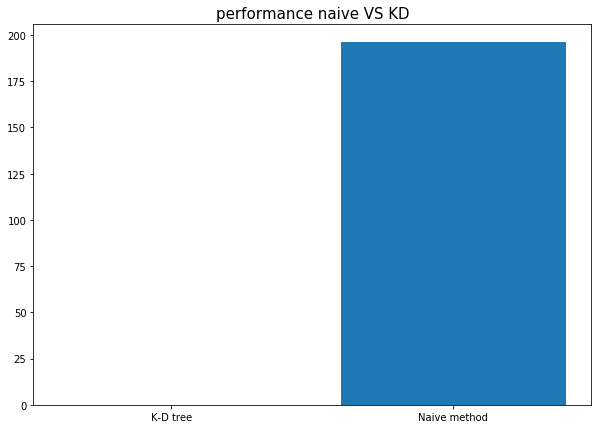

In [24]:
from typing import List
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import time


class Point(namedtuple("Point", "x y")):
    def __repr__(self) -> str:
        return f'Point{tuple(self)!r}'


class Rectangle(namedtuple("Rectangle", "lower upper")):
    def __repr__(self) -> str:
        return f'Rectangle{tuple(self)!r}'

    def is_contains(self, p: Point) -> bool:
        return self.lower.x <= p.x <= self.upper.x and self.lower.y <= p.y <= self.upper.y


# node for kd tree
# location is point
# left: left point, right: right point
class Node(namedtuple("Node", "location left right")):
    """
    location: Point
    left: Node
    right: Node
    """

    def __repr__(self):
        return f'{tuple(self)!r}'


# kd tree class
class KDTree:
    """k-d tree"""

    def __init__(self):
        self._root = None
        self._n = 0

    # p is the point linst
    # dim is the cutting dimension
    # dfs to insert insert nodes
    def inserthelper(self, p: List[Point], dim):

        if p == None or len(p) == 0:
            return None
        p = sorted(p, key = lambda x:x[dim])
        mid = len(p) // 2
        dim = (dim+1) % 2
        return  Node(location=p[mid], left=self.inserthelper(p[:mid], dim), right=self.inserthelper(p[mid+1:], dim))
    
    # call insertHelper to insert nodes
    def insert(self, p: List[Point]):
        if p == None or len(p) == 0:
            return
        self._root = self.inserthelper(p, 0)
        self._n = len(p)
        return self._root

    # range query
    # bfs to query every node in the KD tree
    def range(self, rectangle: Rectangle) -> List[Point]:
        
        dim_filter = ((rectangle.lower[0], rectangle.upper[0]), (rectangle.lower[1], rectangle.upper[1]))
        points = []

        query = [(self._root, 0)]
        while query:

            node, dim = query.pop(0)
            
            if node.location[dim] >= dim_filter[dim][0] and node.left != None:
                query.append((node.left, (dim + 1) % 2))
            if node.location[dim] <= dim_filter[dim][1] and node.right != None:
                query.append((node.right, (dim + 1) % 2))
            if rectangle.is_contains(node.location):
                points.append(node.location)
            
        return points


# insert points of [(7, 2), (5, 4), (9, 6), (4, 7), (8, 1), (2, 3)]
# query the inner point in [(0, 0), (6, 6)]
# check the query method of kd-tree, the right answer is [(2, 3), (5, 4)]
def range_test():
    points = [Point(7, 2), Point(5, 4), Point(9, 6), Point(4, 7), Point(8, 1), Point(2, 3)]
    kd = KDTree()
    kd.insert(points)
    result = kd.range(Rectangle(Point(0, 0), Point(6, 6)))
    assert sorted(result) == sorted([Point(2, 3), Point(5, 4)])


# insert points of (0, 1000) * (0, 1000)
# query the inner point in [(500, 500), (504, 504)]
# compare the time of query
def performance_test():
    points = [Point(x, y) for x in range(1000) for y in range(1000)]

    
    upper = Point(504, 504)
    lower = Point(500, 500)
    rectangle = Rectangle(lower, upper)
    #  naive method
    start = int(round(time.time() * 1000))
    result1 = [p for p in points if rectangle.is_contains(p)]
    end = int(round(time.time() * 1000))
    print(f'Naive method: {end - start}ms')

    naive_time = (end - start)

    kd = KDTree()
    kd.insert(points)
    # k-d tree
    start = int(round(time.time() * 1000))
    result2 = kd.range(rectangle)
    end = int(round(time.time() * 1000))
    print(f'K-D tree: {end - start}ms')

    kd_time = end - start

    
    time_list = [naive_time, kd_time]
    name_list = ["Naive method", "K-D tree"]
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar(x=name_list, height=time_list)
    ax.set_title("performance naive VS KD", fontsize=15)
    plt.show()

    assert sorted(result1) == sorted(result2)


if __name__ == '__main__':
    range_test()
    performance_test()




In [25]:
from typing import List
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import time


class Point(namedtuple("Point", "x y")):
    def __repr__(self) -> str:
        return f'Point{tuple(self)!r}'


class Rectangle(namedtuple("Rectangle", "lower upper")):
    def __repr__(self) -> str:
        return f'Rectangle{tuple(self)!r}'

    def is_contains(self, p: Point) -> bool:
        return self.lower.x <= p.x <= self.upper.x and self.lower.y <= p.y <= self.upper.y

def dist(p1, p2):
    return (p1[0] - p2[0])* (p1[0] - p2[0]) + (p1[1] - p2[1])* (p1[1] - p2[1])

# node for kd tree
# location is point
# left: left point, right: right point
class Node(namedtuple("Node", "location left right")):
    """
    location: Point
    left: Node
    right: Node
    """

    def __repr__(self):
        return f'{tuple(self)!r}'


# kd tree class
class KDTree:
    """k-d tree"""

    def __init__(self):
        self._root = None
        self._n = 0

    # p is the point linst
    # dim is the cutting dimension
    # dfs to insert insert nodes
    def inserthelper(self, p: List[Point], dim):

        if p == None or len(p) == 0:
            return None
        p = sorted(p, key = lambda x:x[dim])
        
        mid = len(p) // 2
        dim = (dim+1) % 2
        return  Node(location=p[mid], left=self.inserthelper(p[:mid], dim), right=self.inserthelper(p[mid+1:], dim))
    
    # call insertHelper to insert nodes
    def insert(self, p: List[Point]):
        
        if p == None or len(p) == 0:
            return
        self._root = self.inserthelper(p, 0)
        self._n = len(p)
        return self._root

    # range query
    # bfs to query every node in the KD tree
    def range(self, rectangle: Rectangle) -> List[Point]:
        
        dim_filter = ((rectangle.lower[0], rectangle.upper[0]), (rectangle.lower[1], rectangle.upper[1]))
        points = []

        query = [(self._root, 0)]
        while query:

            node, dim = query.pop(0)
            
            
            if node.location[dim] >= dim_filter[dim][0] and node.left != None:
                query.append((node.left, (dim + 1) % 2))
            if node.location[dim] <= dim_filter[dim][1] and node.right != None:
                query.append((node.right, (dim + 1) % 2))
            if rectangle.is_contains(node.location):
                points.append(node.location)
        
        return points
    
    # find nearest neighbour for point in KD treee
    def nearest_neighbour_search(self, point) -> Point:
        nd_best = self._root.location
        best_dis = dist(point, self._root.location)
        
        query = [(self._root, 0)]

        while query:
            nd_root, dim = query.pop(0)

            nd_location = nd_root.location
            

            if (point[dim] >= nd_location[dim] and (point[dim] - nd_location[dim]) * (point[dim] - nd_location[dim]) < best_dis) or \
                point[dim] < nd_location[dim]:
                if nd_root.left is not None:
                    query.append((nd_root.left, (dim + 1) % 2))

            if (point[dim] <= nd_location[dim] and (point[dim] - nd_location[dim]) * (point[dim] - nd_location[dim]) < best_dis) or \
                point[dim] > nd_location[dim]:
                if nd_root.right is not None:
                    query.append((nd_root.right, (dim + 1) % 2))
            
            if dist(point, nd_location) < best_dis:
                best_dis = dist(point, nd_location)
                nd_best = nd_location

        return nd_best


# insert points of [(7, 2), (5, 4), (9, 6), (4, 7), (8, 1), (2, 3)]
# query the inner point in [(0, 0), (6, 6)]
# check the query method of kd-tree, the right answer is [(2, 3), (5, 4)]
def range_test():
    points = [Point(7, 2), Point(5, 4), Point(9, 6), Point(4, 7), Point(8, 1), Point(2, 3)]
    kd = KDTree()
    kd.insert(points)
    result = kd.range(Rectangle(Point(0, 0), Point(6, 6)))
    assert sorted(result) == sorted([Point(2, 3), Point(5, 4)])


# insert points of (0, 1000) * (0, 1000)
# query the inner point in [(500, 500), (504, 504)]
# compare the time of query
def performance_test():
    points = [Point(x, y) for x in range(1000) for y in range(1000)]

    lower = Point(500, 500)
    upper = Point(504, 504)
    rectangle = Rectangle(lower, upper)
    #  naive method
    start = int(round(time.time() * 1000))
    result1 = [p for p in points if rectangle.is_contains(p)]
    end = int(round(time.time() * 1000))
    print(f'Naive method: {end - start}ms')

    naive_time = (end - start)

    kd = KDTree()
    kd.insert(points)
    # k-d tree
    start = int(round(time.time() * 1000))
    result2 = kd.range(rectangle)
    end = int(round(time.time() * 1000))
    print(f'K-D tree: {end - start}ms')

    kd_time = end - start

    name_list = ["Naive method", "K-D tree"]
    time_list = [naive_time, kd_time]
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar(x=name_list, height=time_list)
    ax.set_title("performance naive VS KD", fontsize=15)
    plt.show()

    assert sorted(result1) == sorted(result2)


# insert points of [(7, 2), (5, 4), (9, 6), (4, 7), (8, 1), (2, 3)]
# query nearestneighbour of (5, 4)
# check the nearest_neighbour_search method of kd-tree, the right answer is (5, 4)
def nearest_neighbour_test():

    points = [Point(7, 2), Point(5, 4), Point(9, 6), Point(4, 7), Point(8, 1), Point(2, 3)]
    kd = KDTree()
    kd.insert(points)
    result = kd.nearest_neighbour_search(Point(5, 5))
    assert result == Point(5, 4)


if __name__ == '__main__':
   # range_test()
   # performance_test()
    nearest_neighbour_test()


